In [2]:
# Explorary Data Analysis 

import pandas as pd
import numpy as np

# Load the data

data = pd.read_csv('new_data_with_type_changes.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [3]:
'''
The data is already clean and does not contain any missing values.'''

# Data Exploration

# The data contains 10 columns and 1000 rows. The columns are:

data.columns

data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

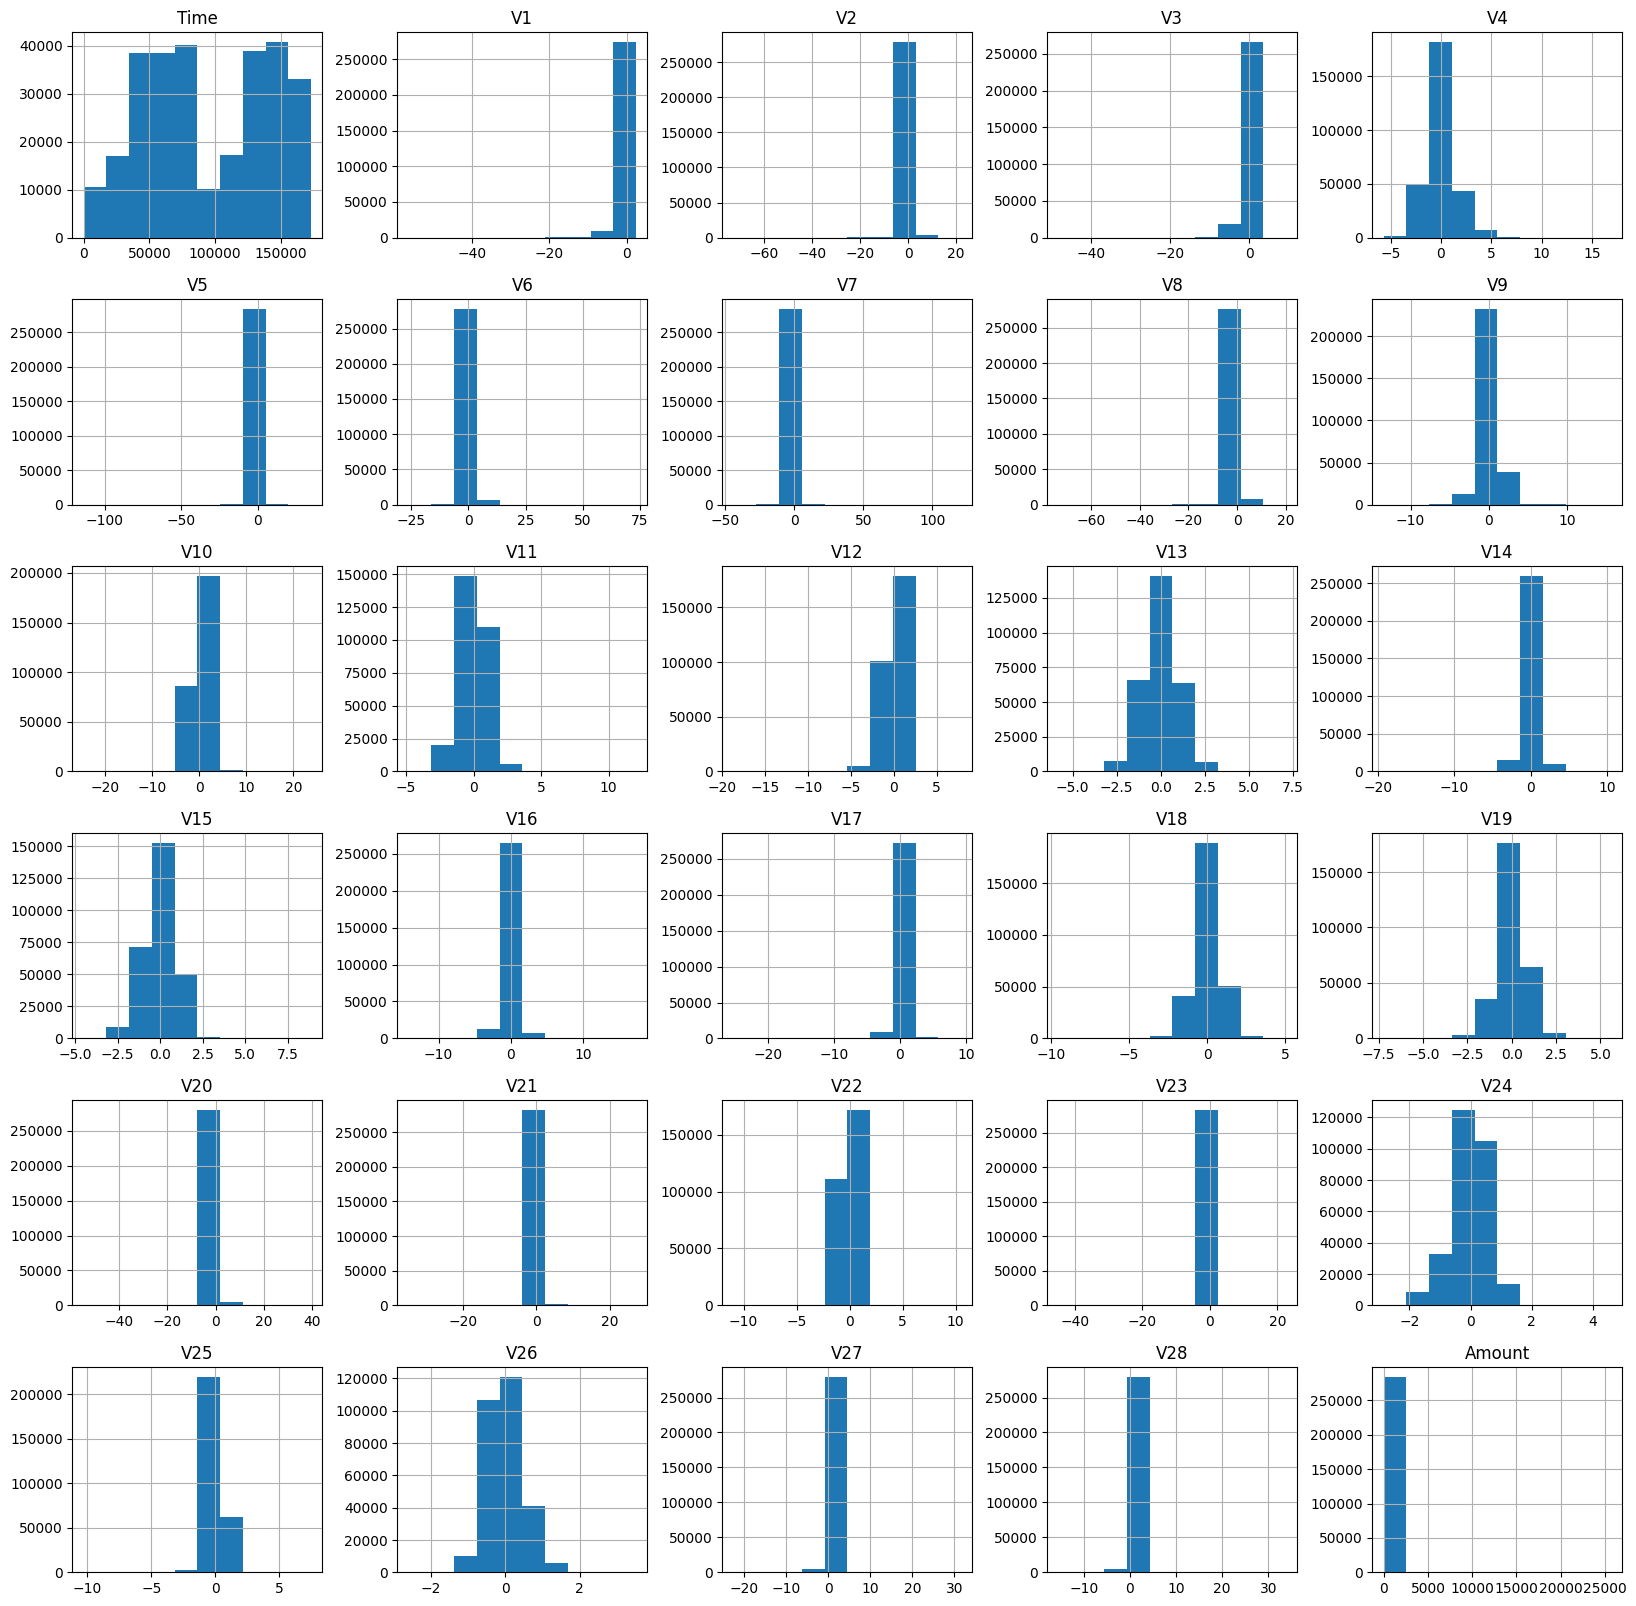

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

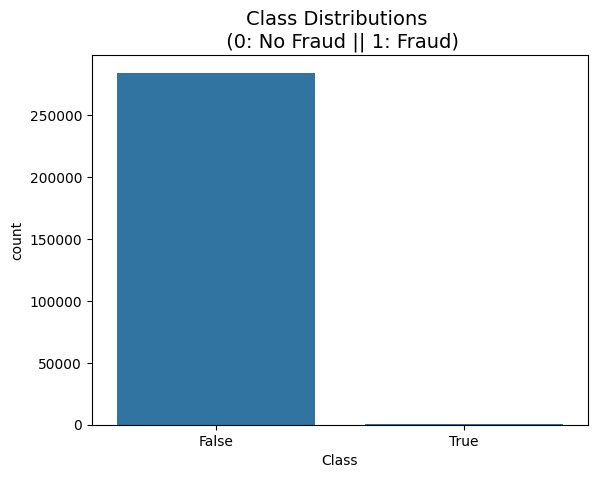

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# The distribution of all the features

data.hist(figsize=(20,20))
plt.show()




# The distribution of the target variable

sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)






C:\Users\PC-1\AppData\Local\Temp\ipykernel_13208\1044099627.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\PC-1\AppData\Local\Temp\ipykernel_13208\1044099627.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


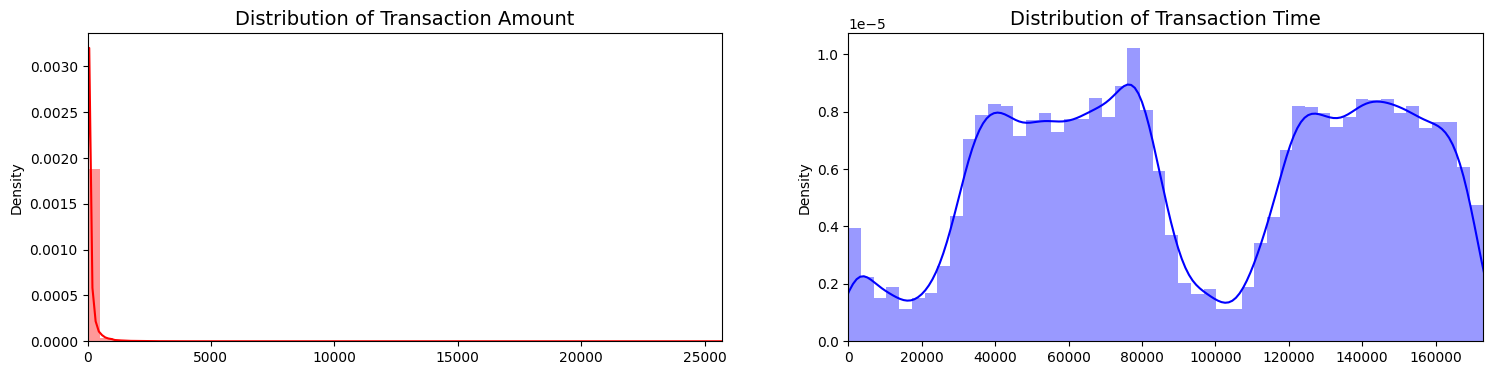

In [5]:
# visualize the amount of money in the transaction

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [6]:
# The distribution of the fraudulent and non-fraudulent transactions

fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

print('Fraud Cases: {}'.format(len(fraud)))
print('Non-Fraud Cases: {}'.format(len(non_fraud)))

outlier_fraction = len(fraud) / float(len(non_fraud))
print('Outlier Fraction: {}'.format(outlier_fraction))


Fraud Cases: 492
Non-Fraud Cases: 284315
Outlier Fraction: 0.0017304750013189597


IndexError: index 30 is out of bounds for axis 0 with size 30

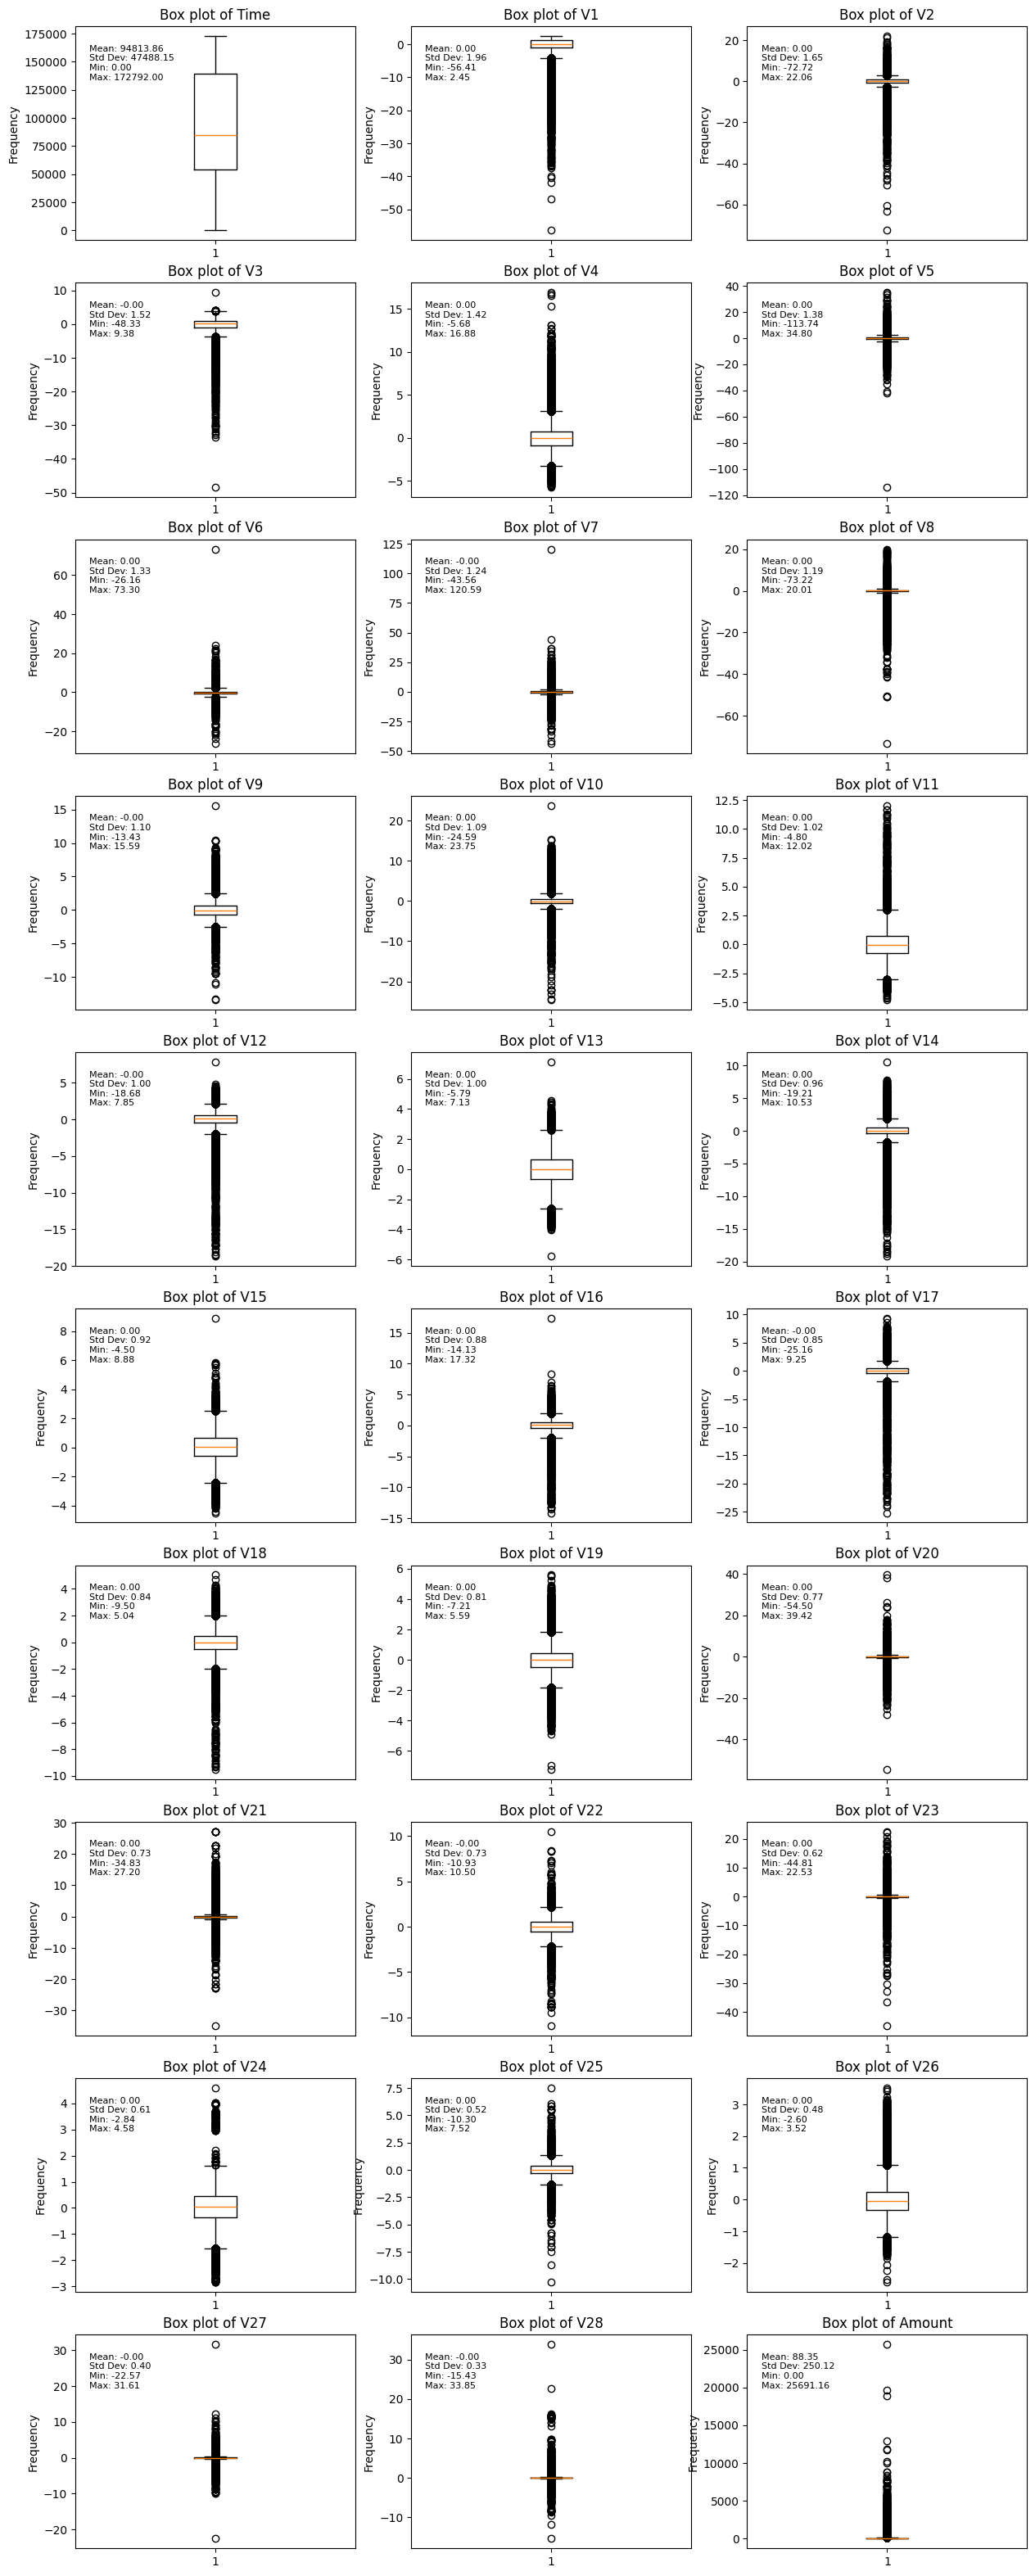

In [7]:
num_rows = (len(data.columns) // 3)
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))
axes = axes.flatten()
summary_stats = data.describe()

for i, col in enumerate(data.columns):
    axes[i].boxplot(data[col].dropna()) 
    axes[i].set_title('Box plot of ' + col)
    
    axes[i].set_ylabel('Frequency')
    stats_text = f"Mean: {summary_stats.loc['mean', col]:.2f}\nStd Dev: {summary_stats.loc['std', col]:.2f}\nMin: {summary_stats.loc['min', col]:.2f}\nMax: {summary_stats.loc['max', col]:.2f}"
    axes[i].annotate(stats_text, xy=(0.05, 0.75), xycoords='axes fraction', fontsize=8, color='black')

plt.tight_layout()
plt.show()

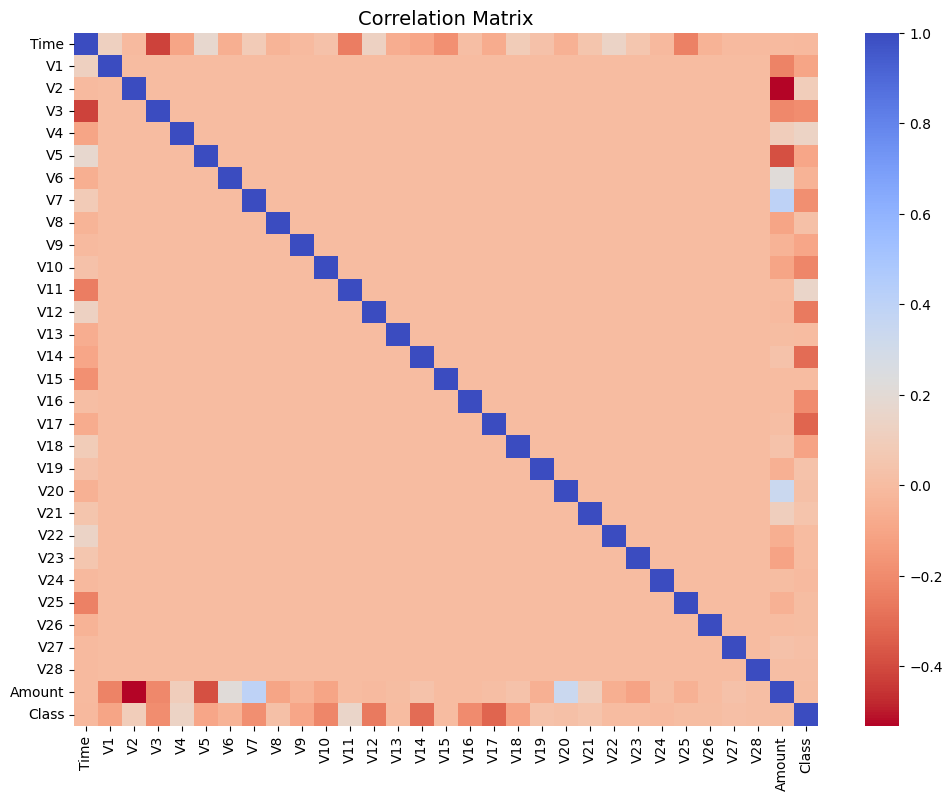

In [ ]:


# The correlation matrix

correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix', fontsize=14)
plt.show()



In [ ]:
'''from sklearn import svm
from sklearn.model_selection import cross_val_score

X = data.drop(['Class'], axis=1)
y = data['Class']


# Create a SVM classifier
clf = svm.SVC(kernel='linear', C=1, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)

# Print the accuracy for each fold
print("Accuracy for each fold: ", scores)

# And the mean accuracy of all 10 folds
print("Mean accuracy of 10-fold cross-validation: ", scores.mean())'''


In [13]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

X = data.drop(['Class'], axis=1)
y = data['Class']

# Create a decision tree classifier
clf_best = DecisionTreeClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)
# Define the metrics to compute
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 10-fold cross-validation and compute all the scores
scores = cross_validate(clf, X, y, cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)

       fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     24.681237    0.022969       0.022647        0.001721     0.979592   
1     17.852036    0.024003       0.998701        0.687500     0.448980   
2     15.857081    0.023998       0.999087        0.701754     0.816327   
3     18.573077    0.023994       0.999192        0.842105     0.653061   
4     17.777078    0.024999       0.999263        0.833333     0.714286   
5     17.073969    0.024001       0.996384        0.247619     0.520000   
6     18.993748    0.025001       0.998736        0.625000     0.700000   
7     15.770109    0.023998       0.998666        0.593220     0.714286   
8     15.717003    0.023997       0.999157        0.765957     0.734694   
9     17.551033    0.022967       0.998947        0.702128     0.673469   
Mean  17.984637    0.023993       0.901078        0.600034     0.695469   

       test_f1  
0     0.003437  
1     0.543210  
2     0.754717  
3     0.735632  
4     0.769231

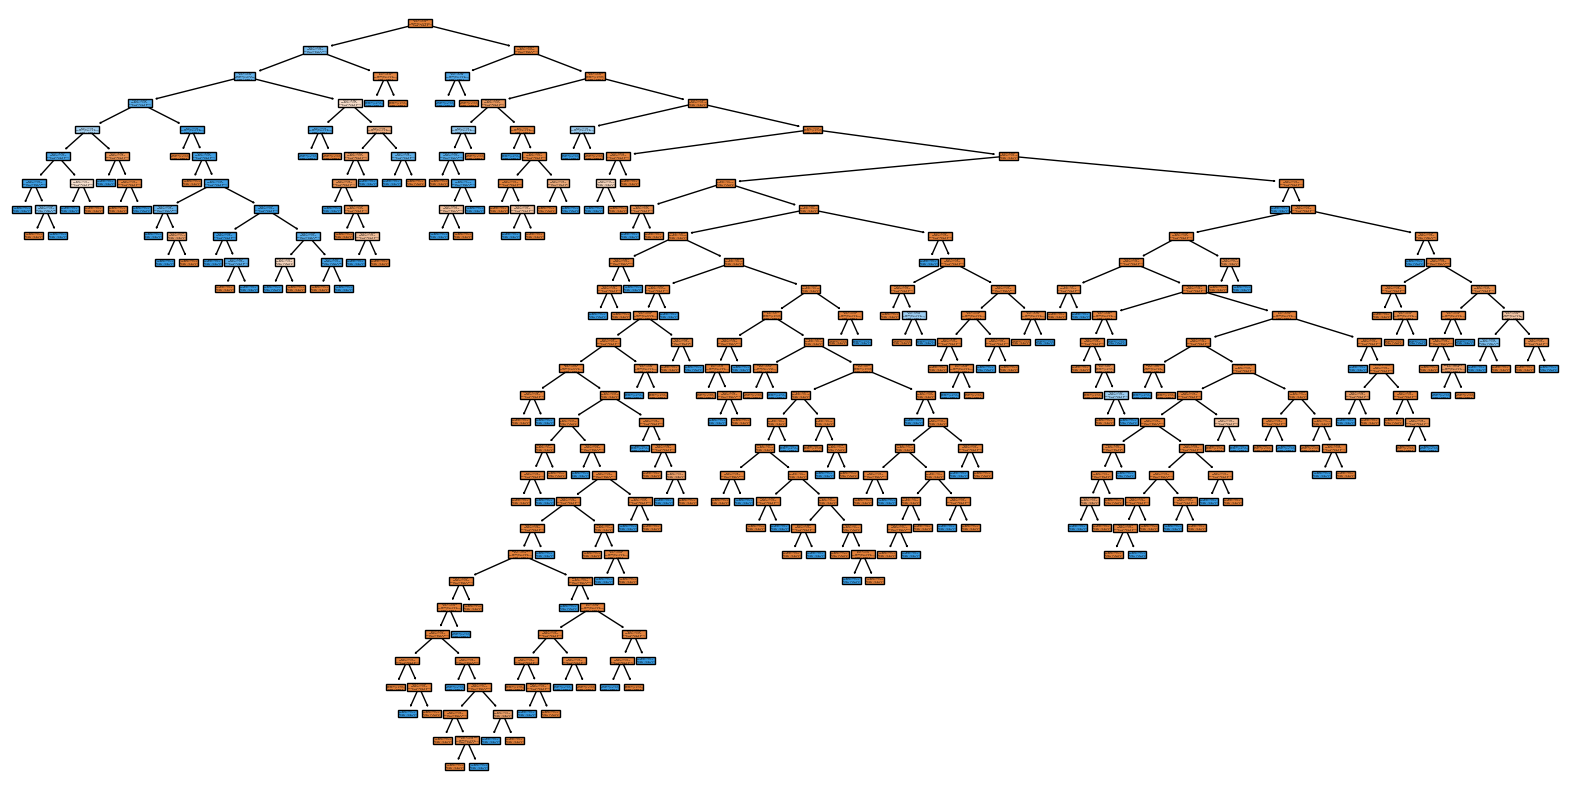

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the model to the data
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(20,10))  # Set the figure size (optional)
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], proportion=True)
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score:  0.9989536795474532
